In [3]:
import numpy as np
# 假设有 3 台机器和 3 个操作
m = 3 # 机器数量
N = 2 # 表示机器的二进制 (0, 1)
n = 2 # 操作数量
l = 1  # 用于表示 C_max 的二进制位数

# 处理时间矩阵 (例如)
p = np.array([[1, 2, 3],[2, 3, 1]])

b = np.array([[0, 0],[1, 0] ,[0, 1]])
# 非法数组(用于表示机器数)(1, 1)
bw = np.array([[1, 1]])
# 常数
K1 = 100
P = 30
# print(len(bw))
# 量子比特数量
num_qubits = n * N + l

In [4]:
def append_multi_rzz_term(qc, qubits, gamma): 
    """
    构建一个类RZZ门，n-1个控制位，1个目标位，进行旋转操作。
    参数:
    control_qubits: List[int]，控制量子比特的索引
    target_qubit: int，目标量子比特的索引
    """
    if len(qubits)==1:
        qc.rz(gamma, qubits[0])
    else:
        control_qubits = qubits[:N-1]
       
        target_qubit = qubits[N-1:]
       
        n_controls = len(control_qubits)
        if n_controls == 1:     
            qc.cx(control_qubits[0],target_qubit[0])
        else:
            qc.mcx(control_qubits, target_qubit[0])
        qc.rz(gamma, target_qubit[0])
        if n_controls == 1:
            qc.cx(control_qubits[0], target_qubit[0])
        else:
            qc.mcx(control_qubits, target_qubit[0])

In [5]:
def append__zz_term( qc, qubit1, qubit2, gamma):
    qc.cx(qubit1, qubit2)
    qc.rz(gamma, qubit2)
    qc.cx(qubit1, qubit2)

def append__z_term(qc, qubit, gamma):
    qc.rz(gamma, qubit)
def append__mixer_term(qc, qubit, beta):
    qc.rx(2 * beta, qubit)

In [6]:
# def get_cost_circuit1(gamma, qc):
#     for h in range(l):
#         coef = - 2**h
#         append__z_term(qc, N * n + h, coef * gamma)
#     return qc

\begin{align}K_{1} \sum_{j\in W} \sum_{i=0}^{n}\prod_{k=0}^{N}\left(\frac{1}2+\left(\frac{1}2-b_{j k}\right)Z_{ik}\right)\end{align}

In [7]:
# import itertools
# def get_cost_circuit2(gamma, qc):
#     # print(len(bw))
#     if len(bw) == 0:
#         return qc
#     # for j in range(len(bw)):
#     #     for i in range(n):
#     #         constant = 1 / (2 ** N)  # 系数 1/2^N
#     #         for num_selected_qubits in range(1, N + 1):  # 从1个到N个qubit的组合项
#     #             qubit_combinations = itertools.combinations(range(N), num_selected_qubits)
#     #             print("num_selected_qubits", num_selected_qubits)
#     #             for i in qubit_combinations:
#     #                 print("i", i)
#     #             print(qubit_combinations)
#     #             for qubit_indices in qubit_combinations:
#     #                 sub_constant = constant
#     #                 qubits_index = np.array([], dtype=int)
#     # 
#     #                 # 根据组合项生成子项的常数和qubit索引
#     #                 for k in range(N):
#     #                     term_coeff = (1 - 2 * bw[j, k]) if k in qubit_indices else 1
#     #                     sub_constant *= term_coeff
#     #                     if k in qubit_indices:
#     #                         qubits_index = np.append(qubits_index, i * N + k)
#     # 
#     #                 append_multi_rzz_term(qc, qubits_index, 2 * K1 * sub_constant * gamma)
#     for j in range(len(bw)):
#         for i in range(n):
#             constant = 1 / (2 ** N)  # 系数 1/2^N
#             all_combinations = list(itertools.chain(*(itertools.combinations(range(N), r) for r in range(1, N + 1))))
#             for c in all_combinations:
#                 print("c", c)
#             for qubit_indices in all_combinations: # 遍历各种组合
#                 sub_constant = constant
#                 qubits_index = np.array([], dtype=int)
# 
#                 # 根据组合项生成子项的常数和qubit索引
#                 for k in range(N):
#                     term_coeff = (1 - 2 * bw[j, k]) if k in qubit_indices else 1
#                     sub_constant *= term_coeff
#                     if k in qubit_indices:
#                         qubits_index = np.append(qubits_index, i * N + k)
#                 # print("qubits_index", qubits_index)
#                 append_multi_rzz_term(qc, qubits_index, 2 * K1 * sub_constant * gamma)
#     return qc

In [8]:
# from qiskit import Aer, QuantumCircuit, execute
# gamma= 1
# qc = QuantumCircuit(num_qubits, num_qubits)
# # qc.h(range(num_qubits))
# # print(qc)
# get_cost_circuit2(gamma, qc)
# print(qc)
# qc.decompose().draw('mpl')

\begin{align}\sum_{j=0}^{m-1}\sum_{i=0}^{n-1} \sum_{i^{\prime}=0}^{n-1}\left(\prod_{k=0}^{N-1}\frac{1}{2}\left(1+\left(1-2b_{j k}\right) Z_{i k}\right)\right) p_{i j}\left(\prod_{k^{\prime}=0}^{N-1}\frac{1}{2}\left(1+\left(1-2b_{j k}\right) Z_{i^{\prime} k^{\prime}}\right)\right) p_{i^{\prime} j}\end{align}
\begin{align}-2 \sum_{j=0}^{m-1} \sum_{i=0}^{n-1} \sum_{h=0}^{l-1} \left(\prod_{k=0}^{N-1}\frac{1}{2}\left(1+\left(1-2b_{j k}\right) Z_{i k}\right)\right) p_{i j} \cdot 2^{h-1}\left(1-Z_h\right)\end{align}
\begin{align}\sum_{j=0}^{m-1}\sum_{h=0}^{l-1} \sum_{h^{\prime}=0}^{l-1} 2^{h-1} 2^{h^{\prime}-1}\left(1-Z_h-Z_{h^{\prime}}+Z_h Z_{h^{\prime}}\right)\end{align}

In [9]:
# def get_cost_circuit3(gamma, qc):
#     for j in range(len(b)):
#         for i1 in range(n - 1):
#             for i2 in range(i1 + 1, n):
#                 constant = 1/(2 ** (2 * N)) * p[i1, j] * p[i2, j]     # 更新常数为 1/2^(2*N)
#                  # 遍历 k 和 k' 的组合，生成各子项的组合常数和索引
#                 for num_selected_qubits_1 in range(1, N + 1):
#                     # 生成了指定数量量子比特的所有组合
#                     qubit_combinations_1 = itertools.combinations(range(N), num_selected_qubits_1)
#                     for qubit_indices_1 in qubit_combinations_1:
#                         # 后续将乘以每个选择的量子比特的权重
#                         # 用于存储每组组合的量子比特索引
#                         sub_constant_1 = constant
#                         qubits_index_1 = np.array([], dtype=int)
#                         # 对于每个量子比特位置 k，代码会判断该比特是否在 qubit_indices_1 中
#                         # for k1 in range(N):
#                         #     term_coeff_1 = (1 - 2 * b[j, k1]) if k1 in qubit_indices_1 else 1
#                         #     sub_constant_1 *= term_coeff_1
#                         #     # 如果 k 在 qubit_indices_1 中，该比特索引被加入 qubits_index_1
#                         #     if k1 in qubit_indices_1:
#                         #         qubits_index_1 = np.append(qubits_index_1, i1 * N + k1)
#                         # 第二组 qubit 的组合项
#                         for num_selected_qubits_2 in range(1, N + 1):
#                             qubit_combinations_2 = itertools.combinations(range(N), num_selected_qubits_2)
#                             for qubit_indices_2 in qubit_combinations_2:
#                                 sub_constant_2 = sub_constant_1
#                                 qubits_index_2 = np.array([], dtype=int)
# 
#                                 for k2 in range(N):
#                                     term_coeff_2 = (1 - 2 * b[j, k2]) if k2 in qubit_indices_2 else 1
#                                     sub_constant_2 *= term_coeff_2
#                                     if k2 in qubit_indices_2:
#                                         qubits_index_2 = np.append(qubits_index_2, i2 * N + k2)
#                                 # 检查 qubits_index_1 和 qubits_index_2 是否有相同的索引
#                                 # 如果有相同的索引，跳过这部分乘积计算
#                                 common_qubits = np.intersect1d(qubits_index_1, qubits_index_2)
#                                 if common_qubits.size > 0:
#                                     continue  
#                                 # 将 qubits_index_1 和 qubits_index_2 合并，包含两组组合项的所有量子比特索引
#                                 combined_qubits_index = np.concatenate([qubits_index_1, qubits_index_2])
#                                 append_multi_rzz_term(qc, combined_qubits_index, 2 * P * sub_constant_2 * gamma)
#         for i in range(n):  # 遍历 i 的范围
#             constant = -2 / (2 ** N)  # 公式前的常数因子
# 
#             # 遍历主项的qubit组合
#             for num_selected_qubits in range(1, N + 1):
#                 qubit_combinations = itertools.combinations(range(N), num_selected_qubits)
#                 for qubit_indices in qubit_combinations:
#                     sub_constant = constant
#                     qubits_index = np.array([], dtype=int)
# 
#                     # 根据组合项生成子常数和 qubit 索引
#                     for k in range(N):
#                         term_coeff = (1 - 2 * b[j, k]) if k in qubit_indices else 1
#                         sub_constant *= term_coeff
#                         if k in qubit_indices:
#                             qubits_index = np.append(qubits_index, i * N + k)
# 
#                     # 遍历权重项 h 的范围
#                     for h in range(l):
#                         weight = 2 ** (h - 1)  # 2^(h-1)
#                         combined_constant = sub_constant * weight  # 最终系数
# 
#                         # 构造用于 RZZ 门的组合
#                         full_qubits_index = np.append(qubits_index, n * N + h)  # 结合主项和权重项的索引
# 
#                         # 应用多量子位的 RZZ 门操作
#                         append_multi_rzz_term(qc, full_qubits_index, combined_constant * P * gamma)
#         for h1 in range(l):  # 遍历 h 的范围
#             for h2 in range(l):  # 遍历 h' 的范围
#                 coef = 2 ** (h1 - 1) * 2 ** (h2 - 1)  # 计算系数权重
# 
#                 # -Z_h1 项
#                 append__z_term(qc, n * N + h1, 2 * P * coef * gamma)
# 
#                 # -Z_h2 项
#                 append__z_term(qc, n * N + h2, 2 * P * coef * gamma)
# 
#                 # Z_h1 Z_h2 项
#                 if h1 != h2:  # 避免重复
#                     append__zz_term(qc, n * N + h1, n * N + h2, 2 * P * coef * gamma)
                

In [10]:
import itertools
from collections import Counter

def get_cost_circuit4(gamma, qc):
    for j in range(len(b)):
        # 对应12, 13, 23, 45, 46, 56
        # for i in range(n): # 自身内部相乘，对应12, 13, 23, 45, 46, 56
        #     all_combinations_1 = list(itertools.chain(*(itertools.combinations(range(N), r) for r in range(1, N + 1))))
        #     # 获取 all_combinations_1 中任意两项的所有组合
        #     all_two_combinations = list(itertools.combinations(all_combinations_1, 2))
        #     for qubit_indices in all_two_combinations: # 遍历各种组合
        #         # print("qubit_indices", qubit_indices)
        #         # sub_constant = constant
        #         qubits_index = np.array([], dtype=int)
        #         constant = 1
        #         # 将组合对中的每个元素（每个元素本身也是一个组合）放入数组
        #         for combo in qubit_indices: # qubit_indices: ((0,), (1,)) 
        #             for k in combo: # combo: (0,)
        #                 constant = constant * (1 - 2 * b[j, k])
        #                 qubits_index = np.append(qubits_index, i * N + k)
        #             # 将组合项中的所有元素添加到 qubits_index 中
        #         # 剔除出现偶次数的项，奇次数的项保留一个
        # 
        #         count = Counter(qubits_index)
        #         # 仅保留出现次数为奇数的元素一次
        #         qubits_index = [x for x in count if count[x] % 2 != 0]
        #         # print("qubits_index", qubits_index)
        #         constant = 1/(2 ** (2 * N)) * constant * p[i, j] * p[i, j]
        #         append_multi_rzz_term(qc,qubits_index , 2 * P * constant * gamma)
        
        # # 2，对应14, 15, 16, 24, 25, 26, 34, 35, 36
        # all_combinations_1 = list(itertools.chain(*(itertools.combinations(range(N), r) for r in range(1, N + 1))))  
        # all_combinations_2 = list(itertools.chain(*(itertools.combinations(range(N), r) for r in range(1, N + 1))))  
        # for i1 in range(n - 1): # 自身内部相乘，对应14, 15, 16, 24, 25, 26, 34, 35, 36
        #     for i2 in range(i1 + 1, n): # 自身内部相乘，对应23, 45, 46, 56
        #         for qubit_indices_1 in all_combinations_1:
        #             # print("qubit_indices1", qubit_indices_1)
        #             for qubit_indices_2 in all_combinations_2:
        #                 # print("qubit_indices2", qubit_indices_2)
        #                 qubits_index = np.array([], dtype=int)
        #                 constant = 1
        #                 for k1 in qubit_indices_1: # qubit_indices: ((0,), (1,))
        #                     constant = constant * (1 - 2 * b[j, k1])
        #                     qubits_index = np.append(qubits_index, i1 * N + k1)
        #                 for k2 in qubit_indices_2: # qubit_indices: ((0,), (1,))
        #                     constant = constant * (1 - 2 * b[j, k2])
        #                     qubits_index = np.append(qubits_index, i2 * N + k2)
        #                 constant = 1/(2 ** (2 * N)) * constant * p[i1, j] * p[i2, j]
        #                 print("qubits_index", qubits_index)
        #                 append_multi_rzz_term(qc,qubits_index ,2 * P * constant * gamma)
                        
        
        # 对应01,02,03,74,75,76
        all_combinations = list(itertools.chain(*(itertools.combinations(range(N), r) for r in range(1, N + 1))))
        for i1 in range(n): # 取常数 1 固定一个为 p[i_1, j]
            for i2 in range(n): # 取 Z 的下标 Z_i2k
                for qubit_indices in all_combinations: # 取 排列组合
                    qubits_index = np.array([], dtype=int)
                    constant = 1
                    for k in qubit_indices:
                        constant = constant * (1 - 2 * b[j, k])
                        qubits_index = np.append(qubits_index, i2 * N + k)
                    constant = 1/(2 ** (2 * N)) * constant * p[i1, j] * p[i2, j]
                    print("qubits_index", qubits_index)
                    append_multi_rzz_term(qc,qubits_index ,2 * P * constant * gamma)
                    
                

qubits_index [0]
qubits_index [1]
qubits_index [0 1]
qubits_index [2]
qubits_index [3]
qubits_index [2 3]
qubits_index [0]
qubits_index [1]
qubits_index [0 1]
qubits_index [2]
qubits_index [3]
qubits_index [2 3]
     ┌──────────┐                      ┌─────────┐                     
q_0: ┤ Rz(3.75) ├──■────────────────■──┤ Rz(7.5) ├──■───────────────■──
     ├──────────┤┌─┴─┐┌──────────┐┌─┴─┐├─────────┤┌─┴─┐┌─────────┐┌─┴─┐
q_1: ┤ Rz(3.75) ├┤ X ├┤ Rz(3.75) ├┤ X ├┤ Rz(7.5) ├┤ X ├┤ Rz(7.5) ├┤ X ├
     ├─────────┬┘└───┘└──────────┘└───┘└┬────────┤└───┘└─────────┘└───┘
q_2: ┤ Rz(7.5) ├───■────────────────■───┤ Rz(15) ├──■───────────────■──
     ├─────────┤ ┌─┴─┐┌─────────┐ ┌─┴─┐ ├────────┤┌─┴─┐ ┌────────┐┌─┴─┐
q_3: ┤ Rz(7.5) ├─┤ X ├┤ Rz(7.5) ├─┤ X ├─┤ Rz(15) ├┤ X ├─┤ Rz(15) ├┤ X ├
     └─────────┘ └───┘└─────────┘ └───┘ └────────┘└───┘ └────────┘└───┘
q_4: ──────────────────────────────────────────────────────────────────
                                                                    

E:\Anaconda3\anaconda3\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


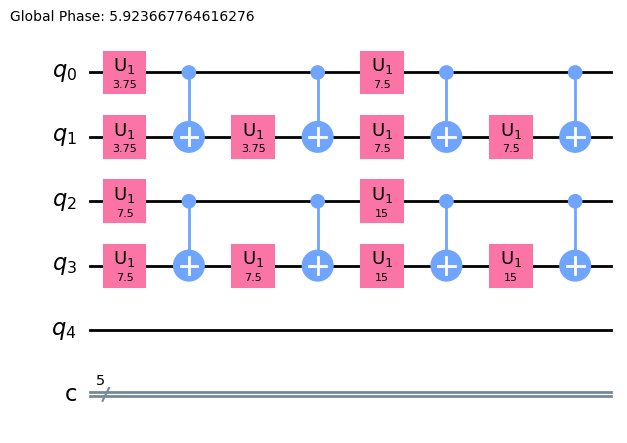

In [11]:
from qiskit import Aer, QuantumCircuit, execute
gamma= 1
qc = QuantumCircuit(num_qubits, num_qubits)
get_cost_circuit4(gamma, qc)
print(qc)
qc.decompose().draw('mpl')

In [109]:
from qiskit import Aer, QuantumCircuit, execute
gamma= 1
qc = QuantumCircuit(num_qubits, num_qubits)
# qc.h(range(num_qubits))
# print(qc)
get_cost_circuit4(gamma, qc)
# print(qc)
# qc.decompose().draw('mpl')

qubit_indices ((0,), (1,))
qubits_index [0, 1]
qubit_indices ((0,), (0, 1))
qubits_index [1]
qubit_indices ((1,), (0, 1))
qubits_index [0]
qubit_indices ((0,), (1,))
qubits_index [2, 3]
qubit_indices ((0,), (0, 1))
qubits_index [3]
qubit_indices ((1,), (0, 1))
qubits_index [2]
qubit_indices ((0,), (1,))
qubits_index [0, 1]
qubit_indices ((0,), (0, 1))
qubits_index [1]
qubit_indices ((1,), (0, 1))
qubits_index [0]
qubit_indices ((0,), (1,))
qubits_index [2, 3]
qubit_indices ((0,), (0, 1))
qubits_index [3]
qubit_indices ((1,), (0, 1))
qubits_index [2]
qubit_indices ((0,), (1,))
qubits_index [0, 1]
qubit_indices ((0,), (0, 1))
qubits_index [1]
qubit_indices ((1,), (0, 1))
qubits_index [0]
qubit_indices ((0,), (1,))
qubits_index [2, 3]
qubit_indices ((0,), (0, 1))
qubits_index [3]
qubit_indices ((1,), (0, 1))
qubits_index [2]


In [53]:
def get_mixer_circuit(beta, qc):
    # beta, gamma = params[:len(params)//2], params[len(params)//2:]
    for i in range(num_qubits):
        append__mixer_term(qc, i, beta)
    return qc

In [54]:
def invert_counts(s):
    return s[::-1]

In [55]:
from qiskit import Aer, QuantumCircuit, execute
# 定义成本函数
def cost_function(params):
    beta, gamma = params[:len(params)//2], params[len(params)//2:]
    num_qubits = n * N + l
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))
    # print(qc)

    length  = len(params)
    for i in range(int(length/2)):

        get_cost_circuit1(gamma[i], qc)
        get_cost_circuit2(gamma[i], qc)
        get_cost_circuit3(gamma[i], qc)
        get_mixer_circuit(beta[i], qc)
    # 模拟电路
    # 添加测量指令
    qc.measure(range(num_qubits), range(num_qubits))
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, seed_simulator=10, shots=10000).result()
    counts = result.get_counts(qc)
    # 计算期望值
    expectation = 0
    for bitstring, count in counts.items():
        bitstring = invert_counts(bitstring)
        prob = count / 10000
        z_h = np.array([int(bit) for bit in bitstring[(n*N):]])
        s_ik = np.array([int(bit) for bit in bitstring[:(n*N)]]).reshape(n, N)
        E1 = np.sum([2 ** h * z for h, z in enumerate(z_h)])
        E2 = 0
        for j in range(len(bw)):
            for i in range (n):
                constant = 1
                for k in range (N):
                    constant = constant*(1-(s_ik[i,k]-bw[j,k])**2)
                E2 += constant
        E2 = K1 * E2
        E3 = 0
        for j in range(m):
            constant1 = 0
            for i in range(n):
                constant2 = 1
                for k in range(N):
                    constant2 = constant2*(1-(s_ik[i,k]-b[j,k])**2)
                constant1 += p[i,j]*constant2
            constant3 = 0
            for h in range(l):
                constant3 += 2 ** h * z_h[h]
            constant = max(0, constant1 - constant3)
            E3 += P * (constant)**2
        
        # alpha_s = np.max([0, np.sum(x_ij * p) - np.sum([2 ** h * z for h, z in enumerate(z_h)])])
        
        E =  E1 + E2 + E3
        
        expectation += E * prob

    return expectation, counts

In [56]:
from qiskit_algorithms.optimizers import COBYLA

# 优化 QAOA 参数
def optimize_qaoa(params):
    def objective(params):
        expectation, _ = cost_function(params)

        return expectation

    optimizer = COBYLA(rhobeg = 1.5, tol = 1e-8)
    # params = np.random.rand(2 * p_max) * 2 * np.pi
    result = optimizer.minimize(fun=objective, x0=params)

    return result

In [57]:
import time

# 运行优化
startTime = time.time()
ansatz_final = object()
init_point = np.array([])
counts = {}
min_energy = 0
final_result = object()
for p1 in range(1, 4):
    min_energy = 10000
    for k in range(100):
        print('第：', p1, '层', ' ', '第', k, '个参数')
        init_point_temp = init_point
        beta_p = np.random.uniform(0, np.pi)
        gamma_p = np.random.uniform(0,  2 * np.pi)
        if k >0:
            init_point_temp = np.delete(init_point_temp, 2 * p1 - 1)
            init_point_temp = np.delete(init_point_temp, p1 - 1)
        init_point_temp = np.insert(init_point_temp, p1 - 1, beta_p)
        init_point_temp = np.insert(init_point_temp, 2 * p1 - 1, gamma_p)
        result = optimize_qaoa(init_point_temp)

        # print(result.x)
        optimal_params = result.x

        # 计算最终的能量
        energy, counts_temp = cost_function(result.x)
        if min_energy > energy:
            min_energy = energy
            init_point = optimal_params
            counts = counts_temp
            final_result = result
endTime = time.time()

第： 1 层   第 0 个参数
第： 1 层   第 1 个参数
第： 1 层   第 2 个参数
第： 1 层   第 3 个参数
第： 1 层   第 4 个参数
第： 1 层   第 5 个参数
第： 1 层   第 6 个参数
第： 1 层   第 7 个参数
第： 1 层   第 8 个参数
第： 1 层   第 9 个参数
第： 1 层   第 10 个参数
第： 1 层   第 11 个参数
第： 1 层   第 12 个参数
第： 1 层   第 13 个参数
第： 1 层   第 14 个参数
第： 1 层   第 15 个参数
第： 1 层   第 16 个参数
第： 1 层   第 17 个参数
第： 1 层   第 18 个参数
第： 1 层   第 19 个参数
第： 1 层   第 20 个参数
第： 1 层   第 21 个参数
第： 1 层   第 22 个参数
第： 1 层   第 23 个参数
第： 1 层   第 24 个参数
第： 1 层   第 25 个参数
第： 1 层   第 26 个参数
第： 1 层   第 27 个参数
第： 1 层   第 28 个参数
第： 1 层   第 29 个参数
第： 1 层   第 30 个参数
第： 1 层   第 31 个参数
第： 1 层   第 32 个参数
第： 1 层   第 33 个参数
第： 1 层   第 34 个参数
第： 1 层   第 35 个参数
第： 1 层   第 36 个参数
第： 1 层   第 37 个参数
第： 1 层   第 38 个参数
第： 1 层   第 39 个参数
第： 1 层   第 40 个参数
第： 1 层   第 41 个参数
第： 1 层   第 42 个参数
第： 1 层   第 43 个参数
第： 1 层   第 44 个参数
第： 1 层   第 45 个参数
第： 1 层   第 46 个参数
第： 1 层   第 47 个参数
第： 1 层   第 48 个参数
第： 1 层   第 49 个参数
第： 1 层   第 50 个参数
第： 1 层   第 51 个参数
第： 1 层   第 52 个参数
第： 1 层   第 53 个参数
第： 1 层   第 54 个参数
第： 1 层   第 55 个参数
第：

优化时间： 3041.9616038799286
Optimal parameters: [7.80509097 2.20974292 3.03512575 4.08382095 2.40916403 5.16042135]
Optimal value: 166.04850000000005
Final expectation value: 166.04850000000005
Final measurement counts: {'10011': 4151, '01101': 4019, '00011': 319, '11101': 315, '10111': 305, '01001': 292, '01111': 87, '11011': 84, '00101': 80, '10001': 72, '11001': 55, '00111': 53, '10010': 37, '01100': 33, '11111': 28, '00001': 24, '10101': 21, '01011': 10, '11100': 4, '00010': 3, '10110': 3, '10000': 2, '01000': 2, '10100': 1}


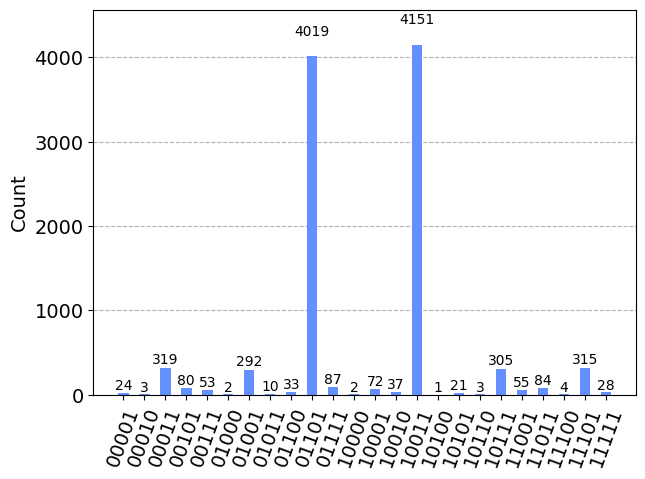

In [60]:
from qiskit.visualization import plot_histogram

# 输出结果
print("优化时间：", endTime - startTime)
print("Optimal parameters:", final_result.x)
print("Optimal value:", final_result.fun)
# 使用最优参数运行量子电路并输出测量结果
final_expectation, final_counts = cost_function(final_result.x)
sorted_dict = {item[0][::-1]: item[1] for item in sorted(final_counts.items(), key=lambda item: item[1], reverse=True)}
print("Final expectation value:", final_expectation)
print("Final measurement counts:", sorted_dict)
plot_histogram(sorted_dict)

In [59]:
expectation = 0
bitstring = "01101"
z_h = np.array([int(bit) for bit in bitstring[(n*N):]])
s_ik = np.array([int(bit) for bit in bitstring[:(n*N)]]).reshape(n, N)
E1 = np.sum([2 ** h * z for h, z in enumerate(z_h)])
E2 = 0
for j in range(len(bw)):
    for i in range (n):
        constant = 1
        for k in range (N):
            constant = constant*(1-(s_ik[i,k]-bw[j,k])**2)
        E2 += constant
E2 = K1 * E2
E3 = 0
for j in range(m):
    constant1 = 0
    # print("机器：", j)
    for i in range(n):
        constant2 = 1
        for k in range(N):
            constant2 = constant2*(1-(s_ik[i,k]-b[j,k])**2)
        # print("constant2:", constant2)
        # print("p[i,j]:", p[i,j])
        constant1 += p[i,j]*constant2
    # print("constant1:", constant1)
    constant3 = 0
    for h in range(l):
        constant3 += 2 ** h * z_h[h]
    # print("constant3:", constant3)
    constant = max(0, constant1 - constant3)
    E3 += (constant)**2
        
        # alpha_s = np.max([0, np.sum(x_ij * p) - np.sum([2 ** h * z for h, z in enumerate(z_h)])])
        
E =  E1 + K1 * E2 + P * E3
print(E1)
print(E2)
print(E3)
# print(e1)
# print(e2)

1
0
5
